<a href="https://colab.research.google.com/github/Kishanditto/CODSOFT/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.
## 2.The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

In [1]:
# load libraries
import numpy as np
import pandas as pd


In [2]:
# read or load the csv file
tit_df = pd.read_csv('/content/tested.csv')

#### Explore the data

In [3]:
# check 1st five rows
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# check the last five rows
tit_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
tit_df.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [6]:
tit_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Handle missing values
tit_df.dropna(subset=['Age', 'Cabin'], inplace=True)  # Remove rows with missing Age or Embarked values

# Convert categorical variables to numerical using one-hot encoding
titanic_data = pd.get_dummies(tit_df, columns=['Sex', 'Cabin'], drop_first=True)

In [8]:
tit_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

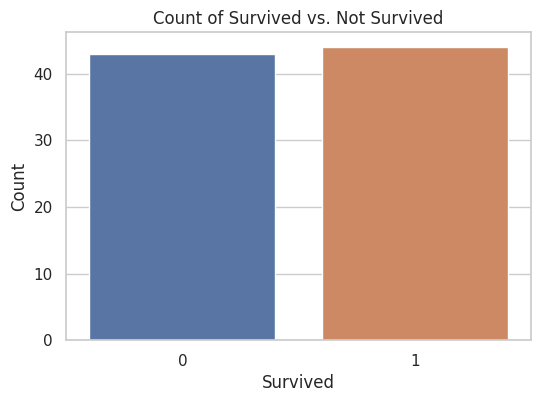

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set(style="whitegrid")

# Visualization 1: Count of Survived vs. Not Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=tit_df)
plt.title("Count of Survived vs. Not Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()



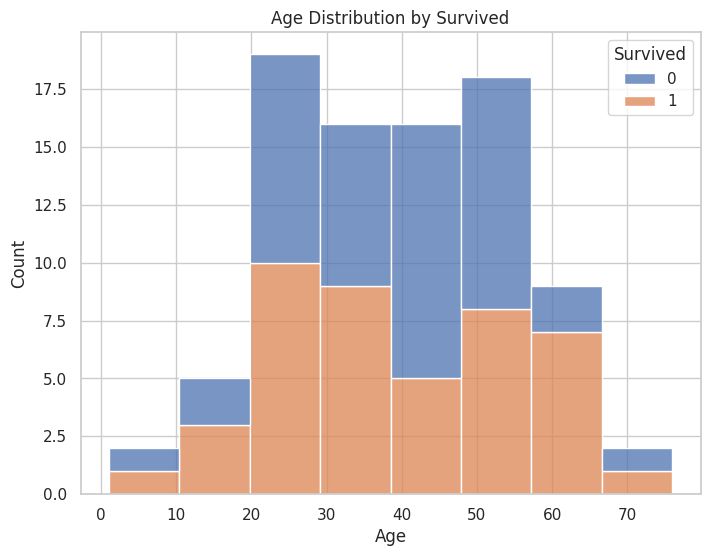

In [10]:
# Visualization 2: Age Distribution by Survived
plt.figure(figsize=(8, 6))
sns.histplot(data=tit_df, x='Age', hue='Survived', multiple='stack')
plt.title("Age Distribution by Survived")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


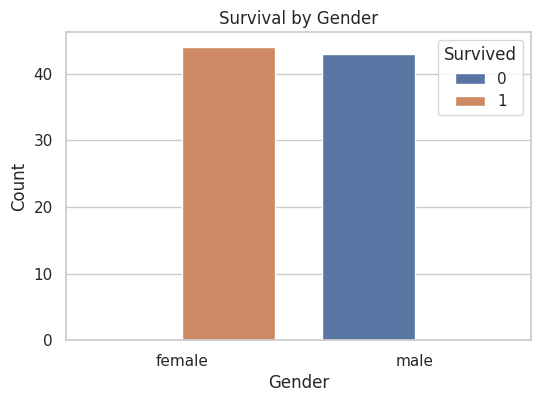

In [11]:
# Visualization 3: Survival by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=tit_df)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

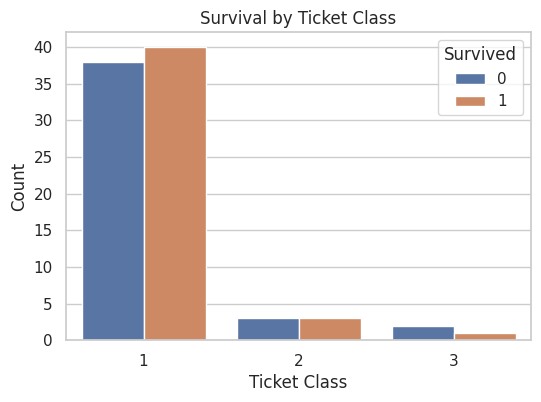

In [12]:
# Visualization 4: Survival by Ticket Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=tit_df)
plt.title("Survival by Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()




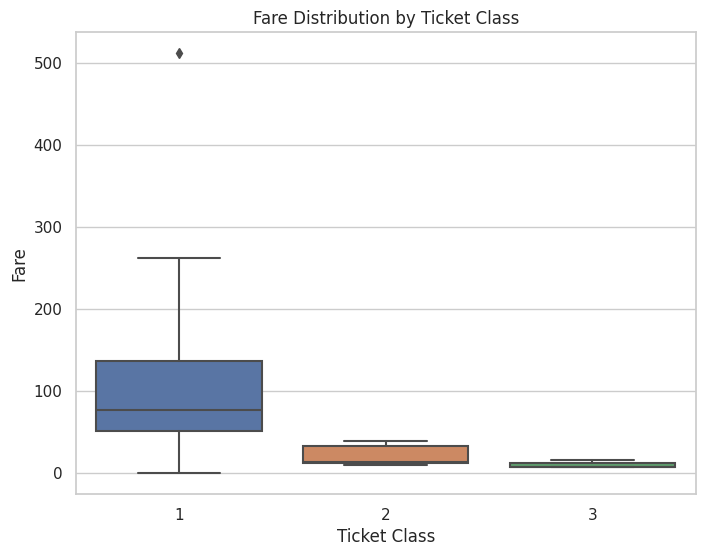

In [13]:
# Visualization 5: Fare Distribution by Ticket Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=tit_df)
plt.title("Fare Distribution by Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Fare")
plt.show()

## Slpit train data and test data

In [14]:
X = tit_df.drop('Survived', axis=1)
y = tit_df['Survived']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Drop 'Name', 'Ticket', and 'Cabin' columns
X_train = X_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
X_test = X_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Apply one-hot encoding to 'Sex' and 'Embarked' columns
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=True)

# Align feature columns of the training and test datasets
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# Standardize numerical features (optional but recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [17]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.5555555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.56      1.00      0.71        10

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

# Fine-Tune and Experiment

## 1.Random Forest:
Random Forest is an ensemble learning method that can provide good performance for this type of classification problem.

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
rf_accuracy = rf_model.score(X_test_scaled, y_test)
print(f'Random Forest Accuracy: {rf_accuracy}')


Random Forest Accuracy: 1.0


## 2. Support Vector Machine (SVM):
SVM is another powerful algorithm for classification tasks. You might need to adjust the hyperparameters, like the kernel and C value, to find the best performance.


In [19]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model
svm_accuracy = svm_model.score(X_test_scaled, y_test)
print(f'SVM Accuracy: {svm_accuracy}')


SVM Accuracy: 1.0


## 3. Neural Networks (MLP):
If you're interested in trying neural networks, you can use the Multi-layer Perceptron (MLP) classifier.

In [20]:
from sklearn.neural_network import MLPClassifier

# Create an MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the model
mlp_model.fit(X_train_scaled, y_train)

# Evaluate the model
mlp_accuracy = mlp_model.score(X_test_scaled, y_test)
print(f'Neural Network (MLP) Accuracy: {mlp_accuracy}')


Neural Network (MLP) Accuracy: 1.0
